In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [8]:
# importando database
db = pd.read_csv('Sprint3 Diabetes.csv')

print(db.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [9]:
# remoção de duplicatas
db.drop_duplicates(inplace=True)
print(db.shape)

# identificação de valores nulos
print(db.isnull().sum())

(229781, 22)
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [10]:
# função para identificar e tratar outliers usando o método IQR
def tratar_outliers_iqr(df, coluna):
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
  df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])
  return df

# aplicar o tratamento de outliers para as colunas numéricas
colunas_numericas = db.select_dtypes(include=np.number).columns
for coluna in colunas_numericas:
  db = tratar_outliers_iqr(db, coluna)

# estatísticas descritivas das variáveis
print(db.describe())

       Diabetes_012         HighBP       HighChol  CholCheck            BMI  \
count      229781.0  229781.000000  229781.000000   229781.0  229781.000000   
mean            0.0       0.454441       0.441760        1.0      28.467902   
std             0.0       0.497921       0.496598        0.0       5.883803   
min             0.0       0.000000       0.000000        1.0      12.000000   
25%             0.0       0.000000       0.000000        1.0      24.000000   
50%             0.0       0.000000       0.000000        1.0      27.000000   
75%             0.0       1.000000       1.000000        1.0      32.000000   
max             0.0       1.000000       1.000000        1.0      44.000000   

              Smoker    Stroke  HeartDiseaseorAttack   PhysActivity  \
count  229781.000000  229781.0              229781.0  229781.000000   
mean        0.465661       0.0                   0.0       0.733355   
std         0.498821       0.0                   0.0       0.442206   
min 

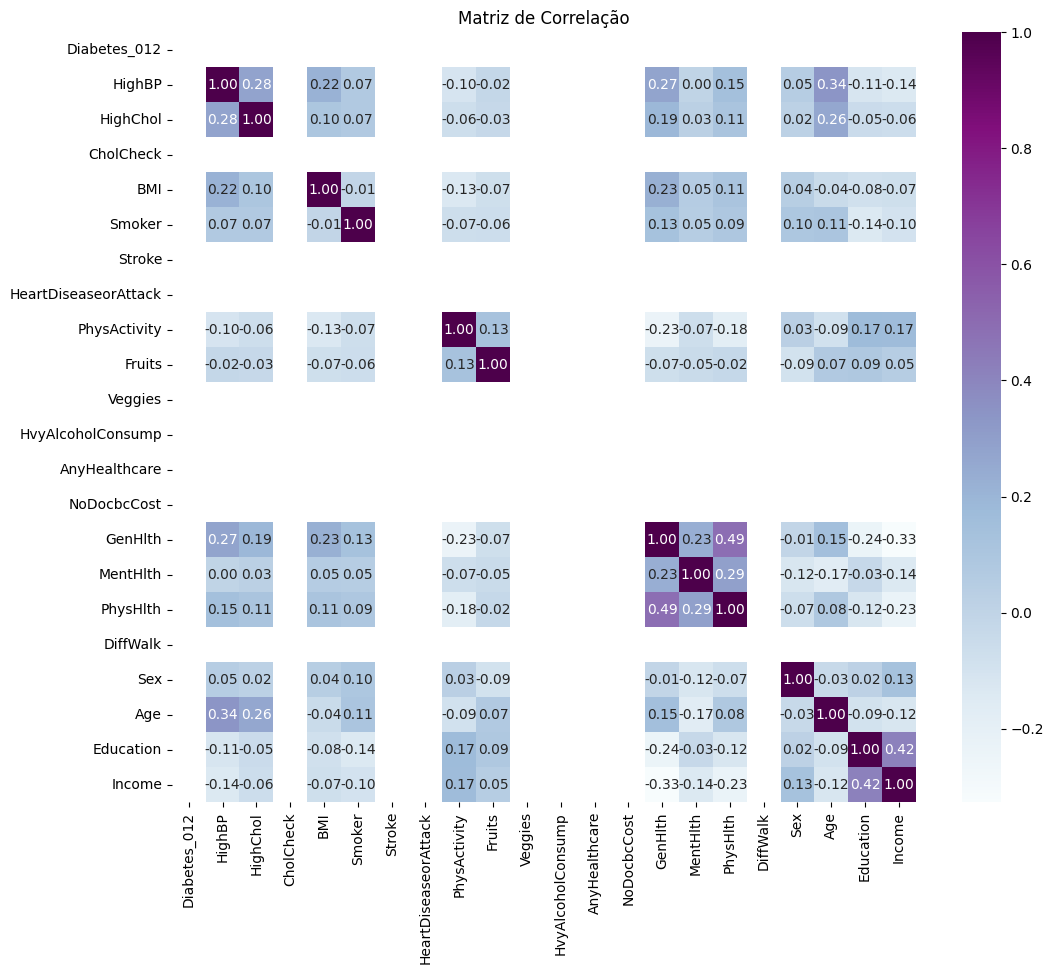

In [33]:
# matriz de correlação
correlation_matrix = db.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

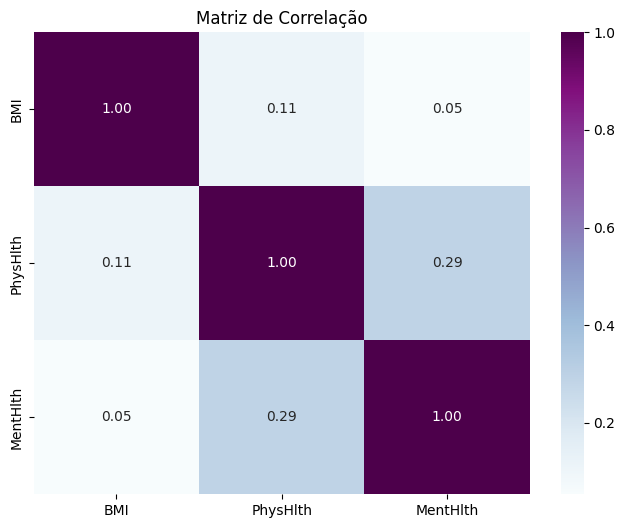

In [55]:
# matriz de correlação
correlation_matrix = db[['BMI', 'PhysHlth', 'MentHlth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


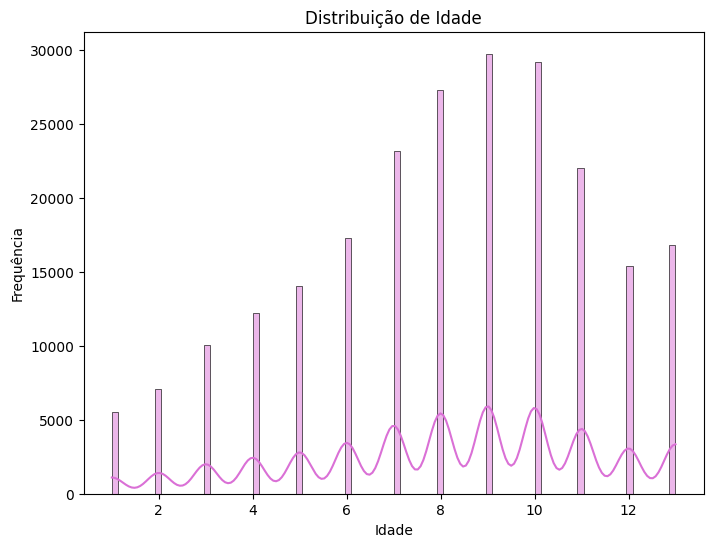

In [28]:
# histograma para a variável Age, para visualizar a distribuição etária.
plt.figure(figsize=(8, 6))
sns.histplot(db['Age'], kde=True, color='orchid')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

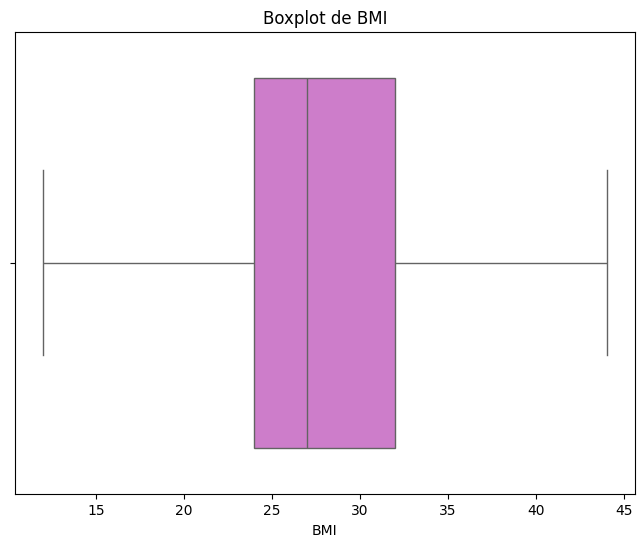

In [36]:
# boxplot para BMI, a fim de identificar outliers e entender a dispersão.
plt.figure(figsize=(8, 6))
sns.boxplot(x=db['BMI'], color='orchid')
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()


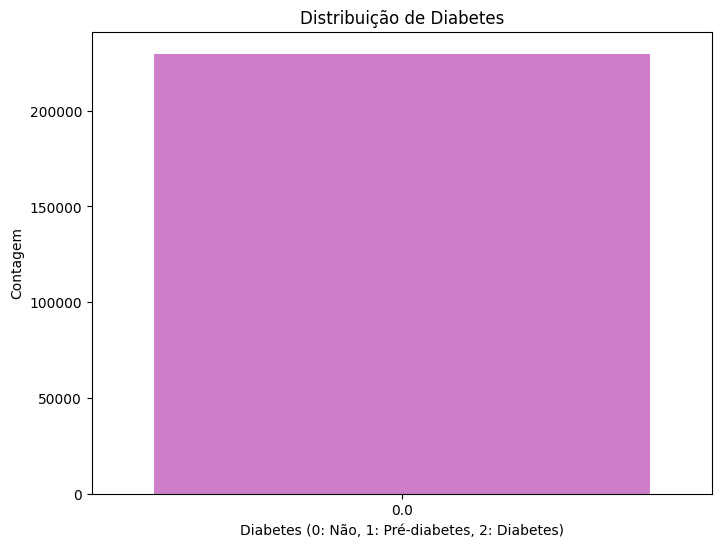

In [48]:
# gráfico de barras para Diabetes_012
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=db, color='orchid')
plt.title('Distribuição de Diabetes')
plt.xlabel('Diabetes (0: Não, 1: Pré-diabetes, 2: Diabetes)')
plt.ylabel('Contagem')
plt.show()


<ipython-input-44-51d14161d168>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighBP', data=db, palette='BuPu')


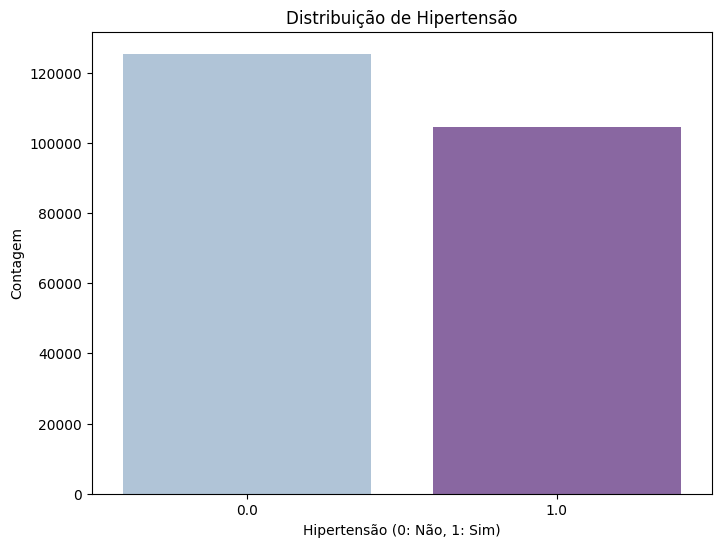

In [44]:
# gráfico de barras para HighBP
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', data=db, palette='BuPu')
plt.title('Distribuição de Hipertensão')
plt.xlabel('Hipertensão (0: Não, 1: Sim)')
plt.ylabel('Contagem')
plt.show()


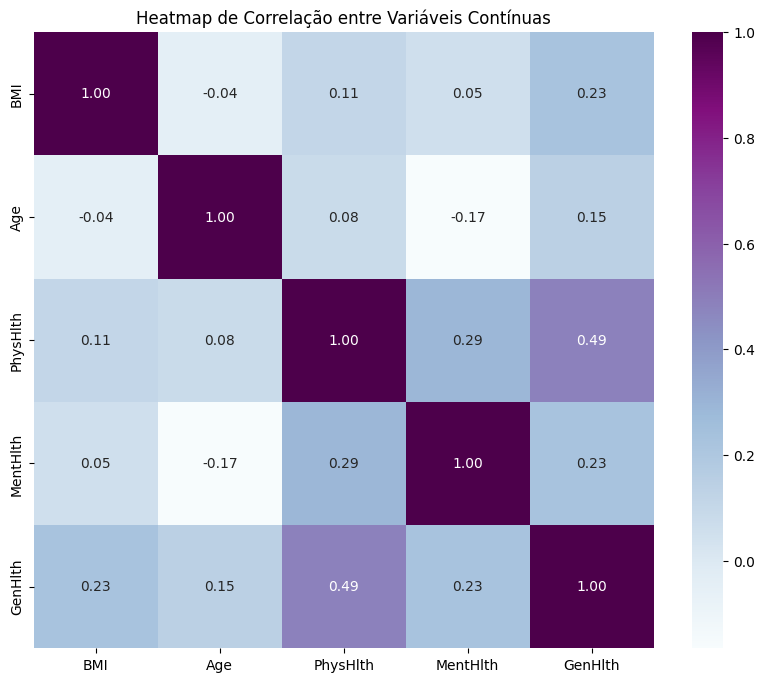

In [50]:
# heatmap de correlação entre as variáveis contínuas, como BMI, Age, PhysHlth, etc.

continuous_vars = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'GenHlth']
correlation_matrix_continuous = db[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_continuous, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Heatmap de Correlação entre Variáveis Contínuas')
plt.show()


In [51]:
# estatísticas descritivas
estatisticas = db.describe()

# exibindo o resultado
print(estatisticas)

# calcular estatísticas individuais
media = db.mean()
mediana = db.median()
desvio_padrao = db.std()
minimo = db.min()
maximo = db.max()

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Máximo:", maximo)

       Diabetes_012         HighBP       HighChol  CholCheck            BMI  \
count      229781.0  229781.000000  229781.000000   229781.0  229781.000000   
mean            0.0       0.454441       0.441760        1.0      28.467902   
std             0.0       0.497921       0.496598        0.0       5.883803   
min             0.0       0.000000       0.000000        1.0      12.000000   
25%             0.0       0.000000       0.000000        1.0      24.000000   
50%             0.0       0.000000       0.000000        1.0      27.000000   
75%             0.0       1.000000       1.000000        1.0      32.000000   
max             0.0       1.000000       1.000000        1.0      44.000000   

              Smoker    Stroke  HeartDiseaseorAttack   PhysActivity  \
count  229781.000000  229781.0              229781.0  229781.000000   
mean        0.465661       0.0                   0.0       0.733355   
std         0.498821       0.0                   0.0       0.442206   
min 

In [57]:
# teste de hipótese

# separar os dados em dois grupos: com diabetes e sem diabetes
grupo_com_diabetes = db[db['Diabetes_012'] == 2]['BMI']
grupo_sem_diabetes = db[db['Diabetes_012'] == 0]['BMI']

# realizar o teste t para comparar as médias dos dois grupos
t_statistic, p_value = stats.ttest_ind(grupo_com_diabetes, grupo_sem_diabetes)

# resultados do teste
print("Teste t para comparar a média do BMI entre indivíduos com e sem diabetes:")
print("Estatística t:", t_statistic)
print("Valor p:", p_value)

# resultados com o nível de significância
alpha = 0.05
if p_value < alpha:
  print("A diferença na média do BMI entre os grupos é estatisticamente significativa.")
else:
  print("A diferença na média do BMI entre os grupos não é estatisticamente significativa.")


Teste t para comparar a média do BMI entre indivíduos com e sem diabetes:
Estatística t: nan
Valor p: nan
A diferença na média do BMI entre os grupos não é estatisticamente significativa.


In [58]:
# teste de hipótese 2

# tabela de contingência entre PhysActivity e Diabetes_012
tabela_contingencia = pd.crosstab(db['PhysActivity'], db['Diabetes_012'])

# teste qui-quadrado
chi2, p_value, _, _ = stats.chi2_contingency(tabela_contingencia)

# resultados
print("Teste qui-quadrado para verificar associação entre atividade física e diabetes:")
print("Qui-quadrado:", chi2)
print("Valor p:", p_value)
alpha = 0.05
if p_value < alpha:
  print("Há uma associação significativa entre o nível de atividade física e a presença de diabetes.")
else:
  print("Não há uma associação significativa entre o nível de atividade física e a presença de diabetes.")


Teste qui-quadrado para verificar associação entre atividade física e diabetes:
Qui-quadrado: 0.0
Valor p: 1.0
Não há uma associação significativa entre o nível de atividade física e a presença de diabetes.
